In [1]:
pip install pattern

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 75.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 13.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.8/349.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=15206b28738ef4b3f6e5b2c41adacfd6bf8cd1944ea208f886d48f741c13c0f8
  Stored in directory: /root/.cache/pip/wheels/d1/8f/40/fe2

In [ ]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/300.2 kB 563.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 563.7 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 952.6 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install googlesearch-python

In [3]:
import pattern
import pandas as pd
import numpy as np
import nltk
import wordcloud
import matplotlib.pyplot as plt
import spacy
import googlesearch
import en_core_web_sm

In [4]:
# povide the info for the query
query = "The most popular data science language"

# we need to perform advanced search to get a lsit of RearchResult
# that contian the following three items:
# - title
# - url
# - description

# Get 100 search results in English using advanced search
# googlesearch will send multiple requests to go through the page by pausing about 5 seconds between the requests
results = list(googlesearch.search(query, num_results=100, sleep_interval=5, lang="en",advanced=True))


# Print the cleaned results
print(results)

[SearchResult(url=https://www.datacamp.com/blog/top-programming-languages-for-data-scientists-in-2022, title=Top programming languages for data scientists in 2023, description=12 Top Data Science Programming Languages in 2023 · Python · R · SQL · Java · Julia · Scala · #C/C++ · JavaScript. JavaScript is ranked #3 ...), SearchResult(url=https://www.edx.org/resources/9-top-programming-languages-for-data-science, title=9 Top Important Programming Languages for Data Science, description=Nine top programming languages for data science · Python · R · SQL · Scala · Julia · JavaScript · Java · C/C++; MATLAB; [Bonus] Excel.), SearchResult(url=https://csweb.rice.edu/academics/graduate-programs/online-mds/blog/programming-languages-for-data-science, title=Top 12 Data Science Programming Languages | MDS@Rice, description=20 Jan 2023 — 1. Python. Python has been among the most popular data science languages in the last several years. A high-level, general-purpose, open-source ...), SearchResult(url

In [5]:
results = [str(item) for item in results]

data =[]
for result in results:
    # Extract URL, title, and description using string manipulation
    url = result.split("url=")[1].split(",")[0]
    title = result.split("title=")[1].split(",")[0]
    description = result.split("description=")[1].split(")")[0]

    # Create a dictionary for each SearchResult
    result_dict = {
        'URL': url,
        'Title': title,
        'Description': description
    }

    # Append the dictionary to the data list
    data.append(result_dict)

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                                                   URL  \
0    https://www.datacamp.com/blog/top-programming-...   
1    https://www.edx.org/resources/9-top-programmin...   
2    https://csweb.rice.edu/academics/graduate-prog...   
3    https://www.knowledgehut.com/blog/data-science...   
4    https://medium.com/@divyanshikulkarni11/what-a...   
..                                                 ...   
97   https://brainstation.io/career-guides/what-too...   
98           https://www.udemy.com/topic/data-science/   
99                  https://www.tiobe.com/tiobe-index/   
100                       https://datasciencedojo.com/   
101  https://www.springboard.com/blog/data-science/...   

                                                 Title  \
0    Top programming languages for data scientists ...   
1    9 Top Important Programming Languages for Data...   
2    Top 12 Data Science Programming Languages | MD...   
3    Top 12 Programming Languages for Data Science ...   
4    What are

## Word Cloud

<function matplotlib.pyplot.show(close=None, block=None)>

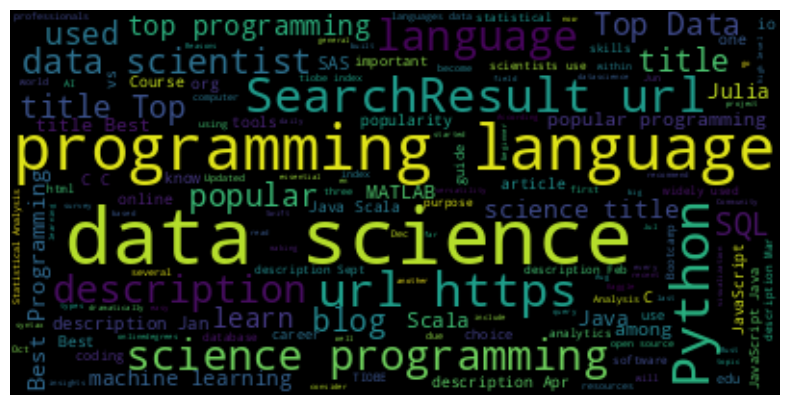

In [9]:
results = " ".join(results)
wordcloud = wordcloud.WordCloud().generate(results)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

## NER

In [11]:
nlp = en_core_web_sm.load()
doc = nlp(results)
if doc.ents:
  for ent in doc.ents:
    print(f'{ent.text} : {ent.label_} - {spacy.explain(ent.label_)}')
  else:
    print("No entities found")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


2023 : DATE - Absolute or relative dates or periods
2023 : DATE - Absolute or relative dates or periods
SQL : PERSON - People, including fictional
Java : PERSON - People, including fictional
Julia : PERSON - People, including fictional
Scala : DATE - Absolute or relative dates or periods
#C/ : MONEY - Monetary values, including unit
JavaScript : PRODUCT - Objects, vehicles, foods, etc. (not services)
JavaScript : ORG - Companies, agencies, institutions, etc.
3 : MONEY - Monetary values, including unit
Nine : CARDINAL - Numerals that do not fall under another type
SQL : PERSON - People, including fictional
Scala : PERSON - People, including fictional
Julia : PERSON - People, including fictional
JavaScript : PRODUCT - Objects, vehicles, foods, etc. (not services)
Java : PERSON - People, including fictional
MATLAB : ORG - Companies, agencies, institutions, etc.
Bonus] Excel : PRODUCT - Objects, vehicles, foods, etc. (not services)
12 : CARDINAL - Numerals that do not fall under another ty